In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
var1 = 0.4**2  # Varianza de la muestra 1
n1 = 15       # Tamaño de la muestra 1
var2 = 0.4**2  # Varianza de la muestra 2
n2 = 15        # Tamaño de la muestra 2
mean1 = 4.2    # Media de la muestra 1
mean2 = 3.9    # Media de la muestra 2
alpha = 0.05  # Nivel de significancia del 1%

Grados de libertad aproximados: 28.00
Estadístico crítico t: 2.0484
Error estándar: 0.15
Margen de error: 0.2992
Intervalo de confianza del 0.95 para la diferencia de medias: (0.0008109870624166127, 0.5991890129375839)
Estadístico t: 2.0540
P-value: 0.04942324311699947
¿Rechazar la hipótesis nula? Sí


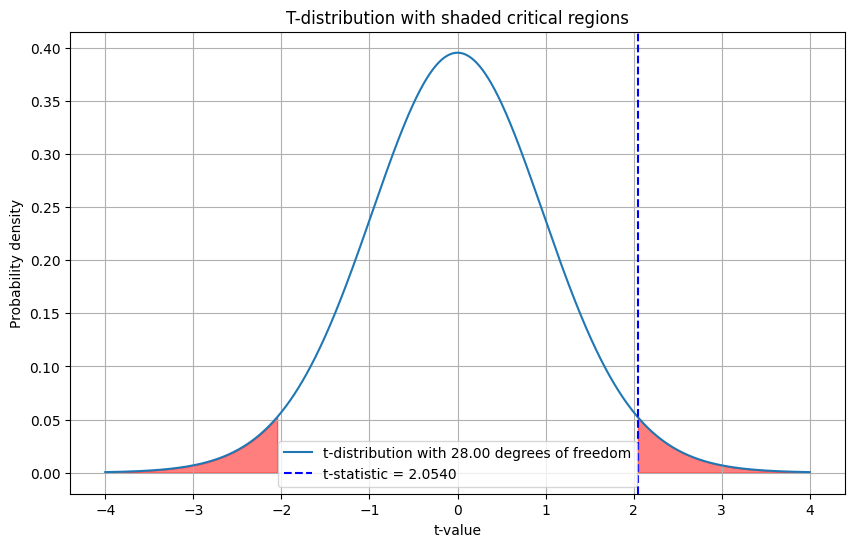

In [10]:
# Función para calcular los grados de libertad con la aproximación de Satterthwaite
def satterthwaite_approximation(var1, n1, var2, n2):
    numerator = (var1 / n1 + var2 / n2) ** 2
    denominator = (var1**2 / ((n1**2) * (n1 - 1))) + (var2**2 / ((n2**2) * (n2 - 1)))
    df = numerator / denominator
    return df

# Calcular los grados de libertad y el valor crítico t para el intervalo de confianza del 99%
df = satterthwaite_approximation(var1, n1, var2, n2)
print(f"Grados de libertad aproximados: {df:.2f}")

t_critical = stats.t.ppf(1 - alpha / 2, df)
print(f"Estadístico crítico t: {t_critical:.4f}")

# Calcular el margen de error
standard_error = np.sqrt(var1 / n1 + var2 / n2)
print(f"Error estándar: {standard_error:.2f}")

margin_of_error = t_critical * standard_error
print(f"Margen de error: {margin_of_error:.4f}")

# Calcular el intervalo de confianza
diff_means = mean1 - mean2
confidence_interval = (diff_means - margin_of_error, diff_means + margin_of_error)
print(f"Intervalo de confianza del {1 - alpha} para la diferencia de medias: {confidence_interval}")

# Calcular el estadístico t y el p-valor
t_statistic = diff_means / standard_error
print(f"Estadístico t: {t_statistic:.4f}")

p_value = 2 * stats.t.sf(np.abs(t_statistic), df)
print(f"P-value: {p_value}")

# Resultados
# Determinar si se rechaza la hipótesis nula, si el intervalo de confianza no contiene el 0
reject_null = 0 < confidence_interval[0] or 0 > confidence_interval[1]
print("¿Rechazar la hipótesis nula?", "Sí" if reject_null else "No")

# Plotting the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-distribution with {df:.2f} degrees of freedom')

# Shading the critical regions
x_fill_left = np.linspace(-4, -t_critical, 1000)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5)

x_fill_right = np.linspace(t_critical, 4, 1000)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5)

# Plotting the t-statistic
t_statistic = diff_means / standard_error
plt.axvline(t_statistic, color='blue', linestyle='--', label=f't-statistic = {t_statistic:.4f}')

plt.title('T-distribution with shaded critical regions')
plt.xlabel('t-value')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()